In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1=pd.read_csv("D:\Python\Project\June2022.csv")
data1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
Sl.No.,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
Factor,Physical performance,Schedules,(As on last day),Fleet Held,(As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),Vehicle Utilisation (in kms),...,Cost of Operation,(Rs. in lakh),Margin (Rs. in lakh),a. On traffic revenue,b. on gross revenue,Earnings Per Kilo Metre (in paise),(On traffic revenue),Earnings Per Kilo Metre (in paise),(On Gross revenue),Cost per kilometer (in paise)
Bengaluru Central,NaN,582.0,NaN,725.0,NaN,73.6,5.8,70.15,73.05,453.6,...,3981.91,NaN,NaN,-677.76,-386.42,4523.4,NaN,4922.3,NaN,5451.3
Ramanagara,NaN,425.0,NaN,491.0,NaN,86.4,4.5,44.09,42.04,330.3,...,1857.9,NaN,NaN,-467.27,-411.21,3307.9,NaN,3441.3,NaN,4419.4
Tumkuru,NaN,578.0,NaN,614.0,NaN,88.9,4.5,62.69,58.29,355.3,...,2435.89,NaN,NaN,-536.87,-429.51,3257.7,NaN,3441.9,NaN,4178.7


In [3]:
D1=data1.T
D1.columns=D1.iloc[1]
D1=D1[2:]
D1
col_to_keep=['Schedules','Fleet Held','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
#remove empty rows
D1.dropna(inplace=True)
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns

Index(['Schedules', 'Fleet Held', 'Fleet Utilisation (%)',
       '% off road  vehicles', 'Schedule kms (in lakh)',
       'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Factor')

In [4]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')

FleetUtilisation=D1['Fleet Utilisation (%)']*0.01
FleetHeldArray=D1['Fleet Held']
EffPassDensity=np.multiply(FleetUtilisation,FleetHeldArray)
D1['EffPassDensity']=EffPassDensity

In [5]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Bengaluru Central to KSRTC
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Schedules                       16 non-null     object
 1   Fleet Held                      16 non-null     object
 2   Fleet Utilisation (%)           16 non-null     object
 3   % off road  vehicles            16 non-null     object
 4   Schedule kms (in lakh)          16 non-null     object
 5   Effective Kilometers (in lakh)  16 non-null     object
 6   City_Id                         16 non-null     int64 
 7   EffPassDensity                  16 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


In [6]:
D1.head()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Bengaluru Central,582.0,725.0,73.6,5.8,70.15,73.05,1,533.6
Ramanagara,425.0,491.0,86.4,4.5,44.09,42.04,2,424.224
Tumkuru,578.0,614.0,88.9,4.5,62.69,58.29,3,545.846
Kolara,507.0,538.0,90.8,5.3,54.33,53.45,4,488.504
Chikkaballapura,521.0,576.0,89.2,4.1,58.29,57.02,5,513.792


In [7]:
D1.tail()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Puttur,478.0,525.0,89.2,3.6,48.13,47.05,12,468.3
Davanagere,345.0,367.0,95.3,3.2,37.28,37.7,13,349.751
Shivamoga,318.0,353.0,90.3,3.9,36.56,36.56,14,318.759
Chitradurga,278.0,307.0,90.6,5.6,30.89,30.02,15,278.142
KSRTC,7395.0,8189.0,88.9,4.1,801.68,794.12,16,7280.021


In [8]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Bengaluru Central to KSRTC
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Schedules                       16 non-null     object
 1   Fleet Held                      16 non-null     object
 2   Fleet Utilisation (%)           16 non-null     object
 3   % off road  vehicles            16 non-null     object
 4   Schedule kms (in lakh)          16 non-null     object
 5   Effective Kilometers (in lakh)  16 non-null     object
 6   City_Id                         16 non-null     int64 
 7   EffPassDensity                  16 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


In [9]:
D1

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Bengaluru Central,582.0,725.0,73.6,5.8,70.15,73.05,1,533.6
Ramanagara,425.0,491.0,86.4,4.5,44.09,42.04,2,424.224
Tumkuru,578.0,614.0,88.9,4.5,62.69,58.29,3,545.846
Kolara,507.0,538.0,90.8,5.3,54.33,53.45,4,488.504
Chikkaballapura,521.0,576.0,89.2,4.1,58.29,57.02,5,513.792
Mysore,947.0,1087.0,86.2,4.2,94.03,95.08,6,936.994
Mandya,422.0,446.0,94.1,3.5,45.31,44.59,7,419.686
Chamarajanagar,460.0,509.0,93.1,2.1,47.59,48.51,8,473.879
Hassan,526.0,558.0,94.6,4.4,56.89,56.5,9,527.868
Chikkamagaluru,499.0,526.0,96.6,2.3,56.56,56.79,10,508.116


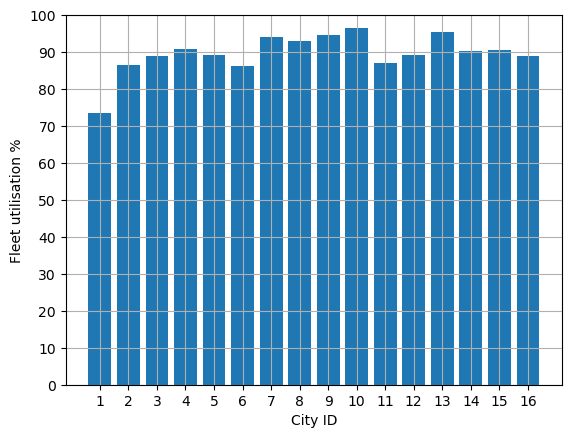

In [10]:
X=D1['City_Id']
Y=D1['Fleet Utilisation (%)']
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Fleet utilisation %')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()


In [11]:
import scipy
print(scipy.__version__)

1.10.0


In [12]:
X=D1['City_Id']
Y=D1['EffPassDensity']
'''
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Effective Passenger Density')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()
'''

"\nplt.bar(X,Y)\nplt.xlabel('City ID')\nplt.ylabel('Effective Passenger Density')\nplt.xticks(X)  # Set x-axis ticks to match city IDs\n# Set y-axis range with a step of 10\nplt.ylim(0, 1000)  # Set the y-axis range from 0 to 100\nplt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10\nplt.grid(True)\nplt.show()\n"

In [13]:
D1

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Bengaluru Central,582.0,725.0,73.6,5.8,70.15,73.05,1,533.6
Ramanagara,425.0,491.0,86.4,4.5,44.09,42.04,2,424.224
Tumkuru,578.0,614.0,88.9,4.5,62.69,58.29,3,545.846
Kolara,507.0,538.0,90.8,5.3,54.33,53.45,4,488.504
Chikkaballapura,521.0,576.0,89.2,4.1,58.29,57.02,5,513.792
Mysore,947.0,1087.0,86.2,4.2,94.03,95.08,6,936.994
Mandya,422.0,446.0,94.1,3.5,45.31,44.59,7,419.686
Chamarajanagar,460.0,509.0,93.1,2.1,47.59,48.51,8,473.879
Hassan,526.0,558.0,94.6,4.4,56.89,56.5,9,527.868
Chikkamagaluru,499.0,526.0,96.6,2.3,56.56,56.79,10,508.116


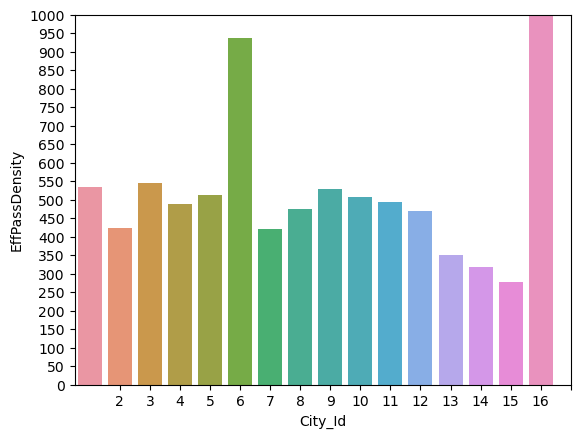

In [14]:
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()

### Descriptive Statistic Analysis
Mean of EffectivePassengerDensity = meanEPD

In [15]:
meanEPD=np.mean(D1['EffPassDensity'])
print('Mean of Effective Passenger Density:',meanEPD)

D1['EffPassDensity'].values


Mean of Effective Passenger Density: 910.04825


array([533.6, 424.22400000000005, 545.8460000000001, 488.504, 513.792,
       936.9940000000001, 419.686, 473.87899999999996, 527.8679999999999,
       508.116, 493.29, 468.3, 349.751, 318.759, 278.142,
       7280.021000000001], dtype=object)

In [16]:
std_by_city = D1['EffPassDensity'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 2906158.6481908676
Standard deviation: 1704.7459189541612


In [17]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['EffPassDensity'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'EffPassDensity':D1['EffPassDensity'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,EffPassDensity,Mean Variations
0,1,533.6,-376.44825
1,2,424.224,-485.82425
2,3,545.846,-364.20225
3,4,488.504,-421.54425
4,5,513.792,-396.25625
5,6,936.994,26.94575
6,7,419.686,-490.36225
7,8,473.879,-436.16925
8,9,527.868,-382.18025
9,10,508.116,-401.93225


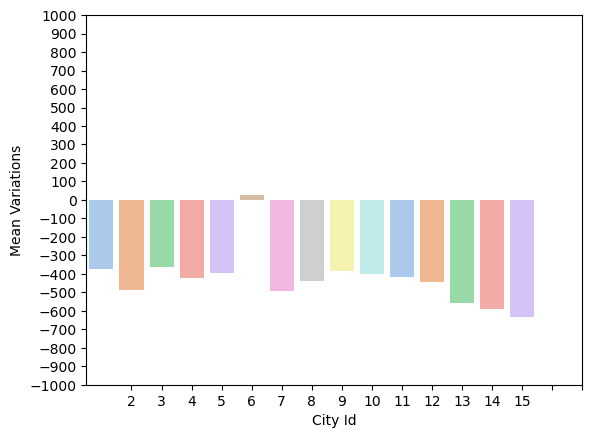

In [18]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\abhib\AppData\Local\Temp\ipykernel_19104\4241719585.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


<Axes: ylabel='Density'>

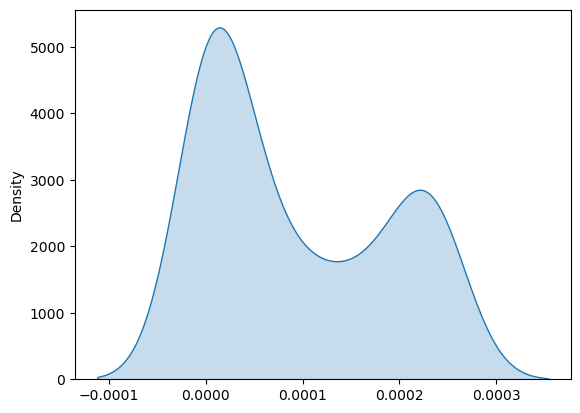

In [19]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['EffPassDensity'])
sd = np.std(D1['EffPassDensity'])
sorted_data = D1['EffPassDensity'].sort_values()
X=np.linspace(D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),100)
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)



In [20]:
Stats = D1.describe(include='all')
cols = Stats.index.tolist()
Stats

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,16.0,16.0,16.0,16.0,16.00,16.00,16.000000,16.0
unique,16.0,16.0,14.0,14.0,16.00,16.00,NaN,16.0
top,582.0,725.0,88.9,4.5,70.15,73.05,NaN,533.6
freq,1.0,1.0,2.0,2.0,1.00,1.00,NaN,1.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.760952,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.750000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,12.250000,NaN


In [21]:
for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%':
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

Stats

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
unique,16.000000,16.00000,14.000000,14.000000,16.000000,16.000000,NaN,16.000000
top,582.000000,725.00000,88.900000,4.500000,70.150000,73.050000,NaN,533.600000
freq,1.000000,1.00000,2.000000,2.000000,1.000000,1.000000,NaN,1.000000
mean,924.375000,1023.62500,89.675000,4.068750,100.210000,99.265000,8.500000,910.048250
std,1731.927823,1918.99244,5.339725,1.022884,187.656189,185.930843,4.760952,1704.745919
min,278.000000,307.00000,73.600000,2.100000,30.890000,30.020000,1.000000,278.142000
25%,424.250000,479.75000,88.425000,3.575000,45.005000,43.952500,4.750000,423.089500
50%,503.000000,532.00000,89.750000,4.100000,55.445000,54.975000,8.500000,490.897000
75%,539.000000,585.50000,93.350000,4.500000,59.840000,57.675000,12.250000,529.301000


<class 'float'>


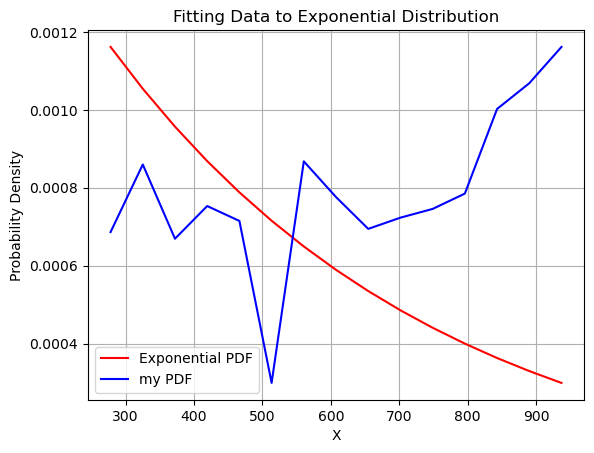

[0.00116158 0.00105424 0.00095683 0.00086841 0.00078817 0.00071534
 0.00064924 0.00058925 0.0005348  0.00048538 0.00044053 0.00039982
 0.00036288 0.00032935 0.00029891] [0.00068624 0.00085969 0.00066915 0.00075306 0.00071483 0.00029891
 0.00086777 0.00077609 0.0006944  0.00072324 0.00074567 0.00078507
 0.00100225 0.00106833 0.00116158]


In [22]:
from scipy.stats import expon

# Given data
data = D1['EffPassDensity'][0:15].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 15)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [23]:
import statistics as stats
from scipy.stats import norm 
import scipy.stats
Xfactor=D1['EffPassDensity'][:15].values
Yfactor=D1['Effective Kilometers (in lakh)'][:15].values
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,Yfactor)
print("Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh):",R[0])


15 15
Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh): 0.9533393282559325


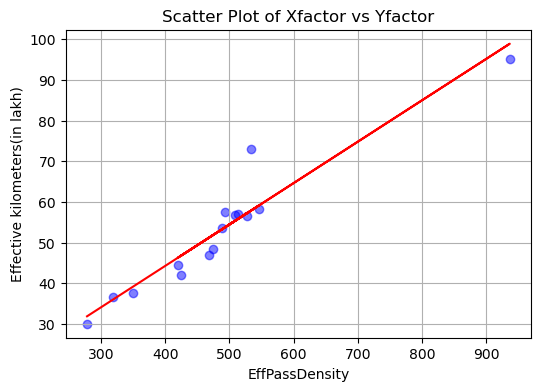

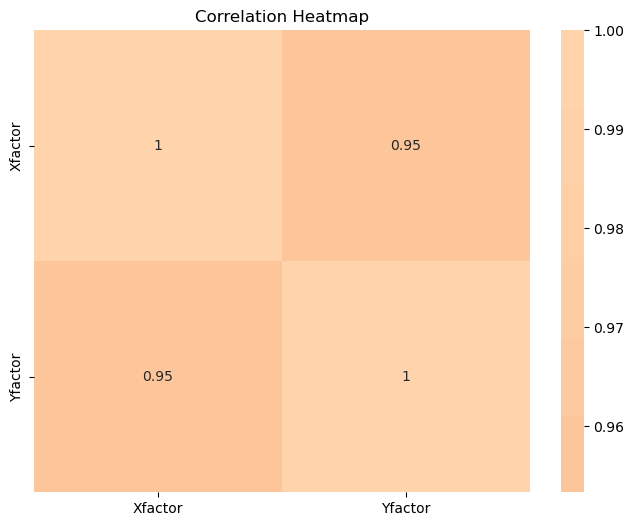

In [24]:
data = {
    'Xfactor': D1['EffPassDensity'][:15].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:15].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('EffPassDensity')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True,center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()
